# Using Selenium for Dynamic News Website Scraping

## Jawapos


Now, let's venture into scraping content from a dynamic website – Jawapos. Before delving into the complexities of dynamic content with Selenium, we'll initiate the process by attempting to scrape using BeautifulSoup. This initial step aims to establish a clear understanding of the differences between static and dynamic websites.

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Filter out warning messages to improve code readability
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages

In [2]:
url_jawapos = 'https://www.jawapos.com/tag/anies-baswedan'

# Making a get request 
response = requests.get(url_jawapos)

In [3]:
print(response)

<Response [403]>


When trying to fetch data from https://www.jawapos.com/tag/anies-baswedan using the `requests` library, we receive a 403 response. This code means that the website won't allow our request, usually due to security measures.

In [4]:
soup = BeautifulSoup(response.content, "html.parser")
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>ERROR: The request could not be satisfied</title>
</head><body>
<h1>403 ERROR</h1>
<h2>The request could not be satisfied.</h2>
<hr noshade="" size="1px"/>
Request blocked.
We can't connect to the server for this app or website at this time. There might be too much traffic or a configuration error. Try again later, or contact the app or website owner.
<br clear="all"/>
If you provide content to customers through CloudFront, you can find steps to troubleshoot and help prevent this error by reviewing the CloudFront documentation.
<br clear="all"/>
<hr noshade="" size="1px"/>
<pre>
Generated by cloudfront (CloudFront)
Request ID: ldibwPBWz-X_50AM2FVSvfWW1SRTJCHY9lysjnTqalD8fy1Nb9n6fQ==
</pre>
<address>
</address>
</body></html>


To handle this, we can't solely rely on `requests` and `BeautifulSoup`. Instead, we need `Selenium`. Selenium lets us automate web browsers, mimicking human interaction. It's like having a virtual person access the website, making it handy for scenarios where direct requests face limitations or security barriers.

So, when faced with a 403 response, turning to Selenium helps us navigate these challenges and successfully scrape data from websites with more complex access rules.

**Let's try using Selenium**

In [5]:
# Import necessary modules from Selenium
from selenium import webdriver
from selenium.webdriver.common.by import By

In [6]:
# Create a new Firefox WebDriver instance
driver = webdriver.Firefox()

After initializing the Firefox WebDriver instance Firefox will automatically open with a blank window like this.

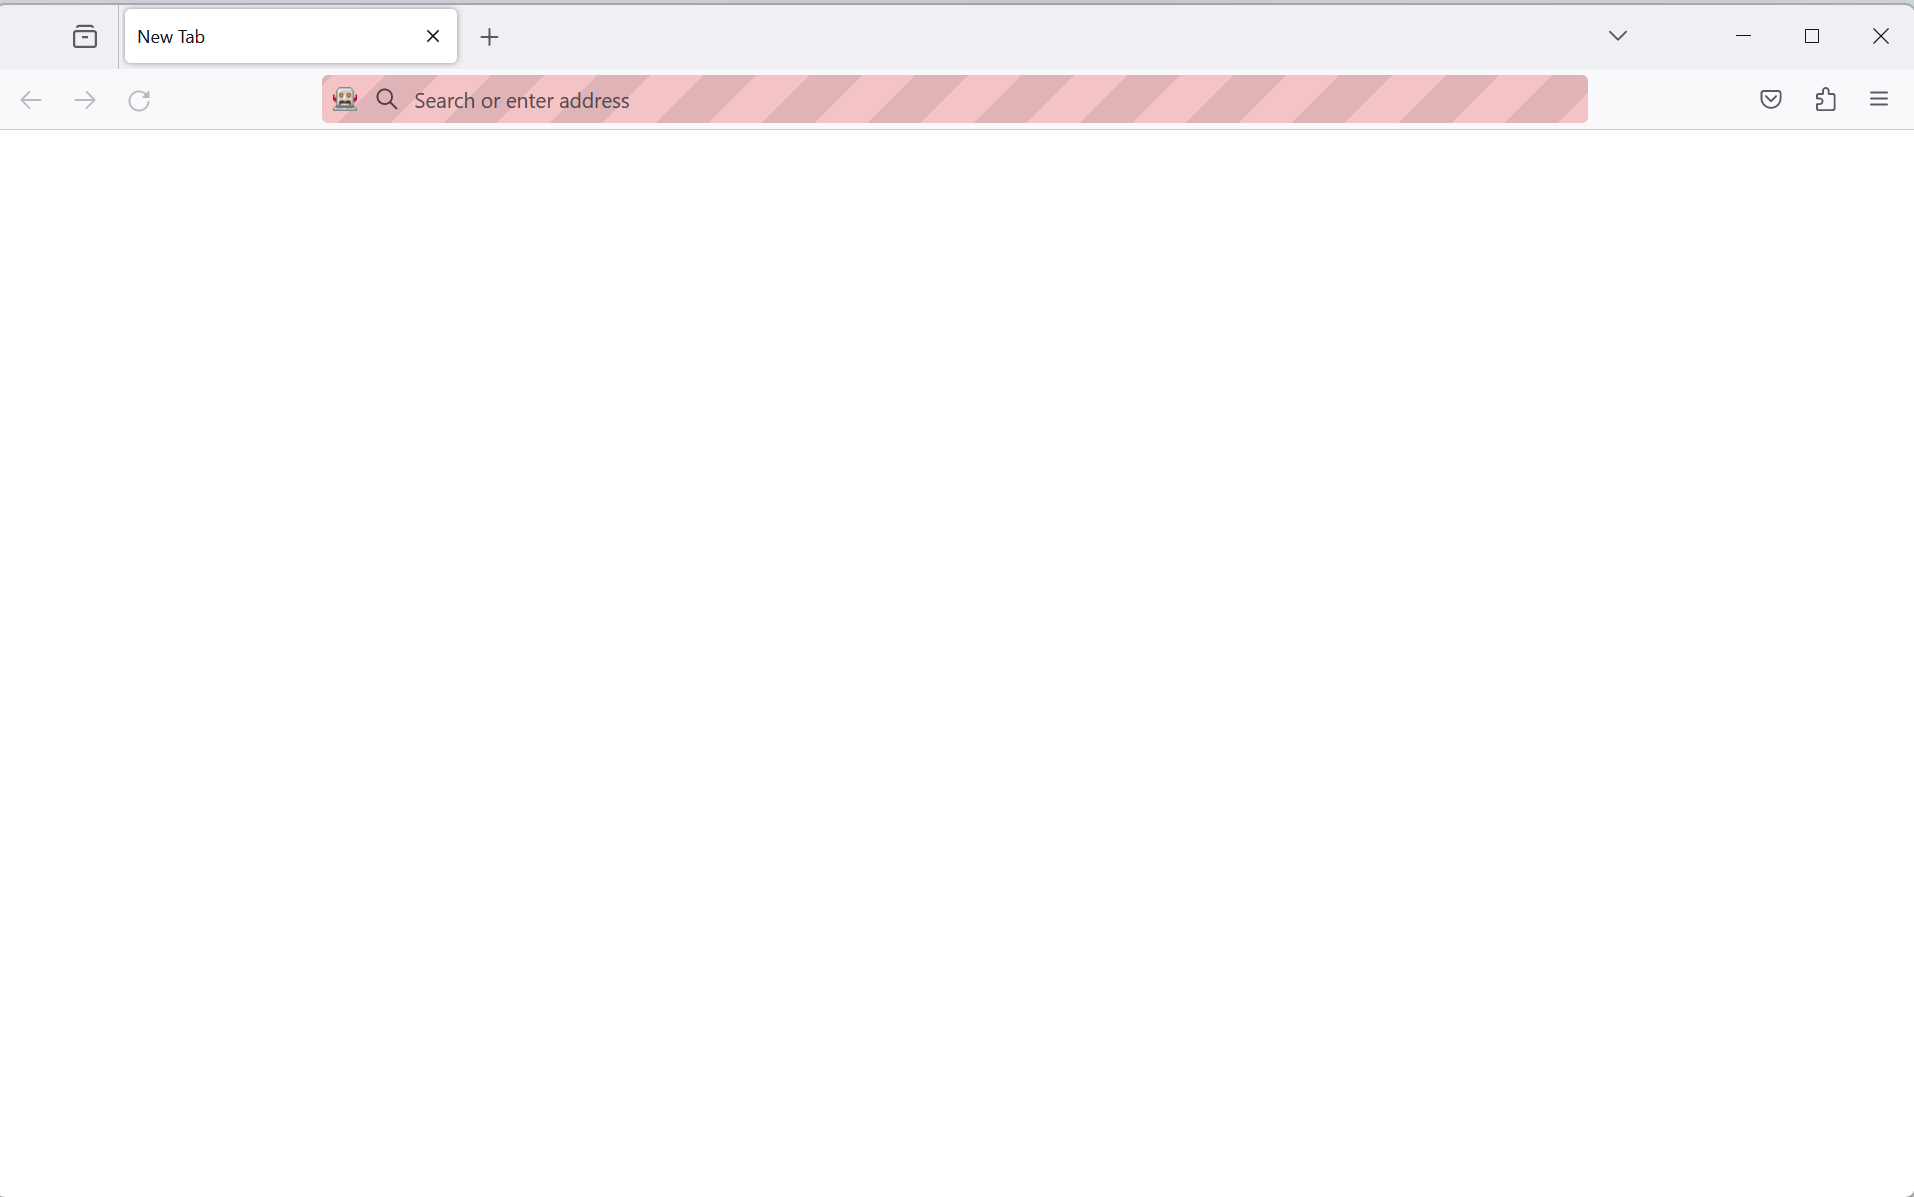

Then, this code instructs the WebDriver to navigate to the URL 'https://www.jawapos.com/tag/anies-baswedan', loading the corresponding web page in the browser.

In [7]:
url_jawa = 'https://www.jawapos.com/tag/anies-baswedan'

# Open the specified URL in the browser using the WebDriver instance ('driver')
driver.get(url_jawa)

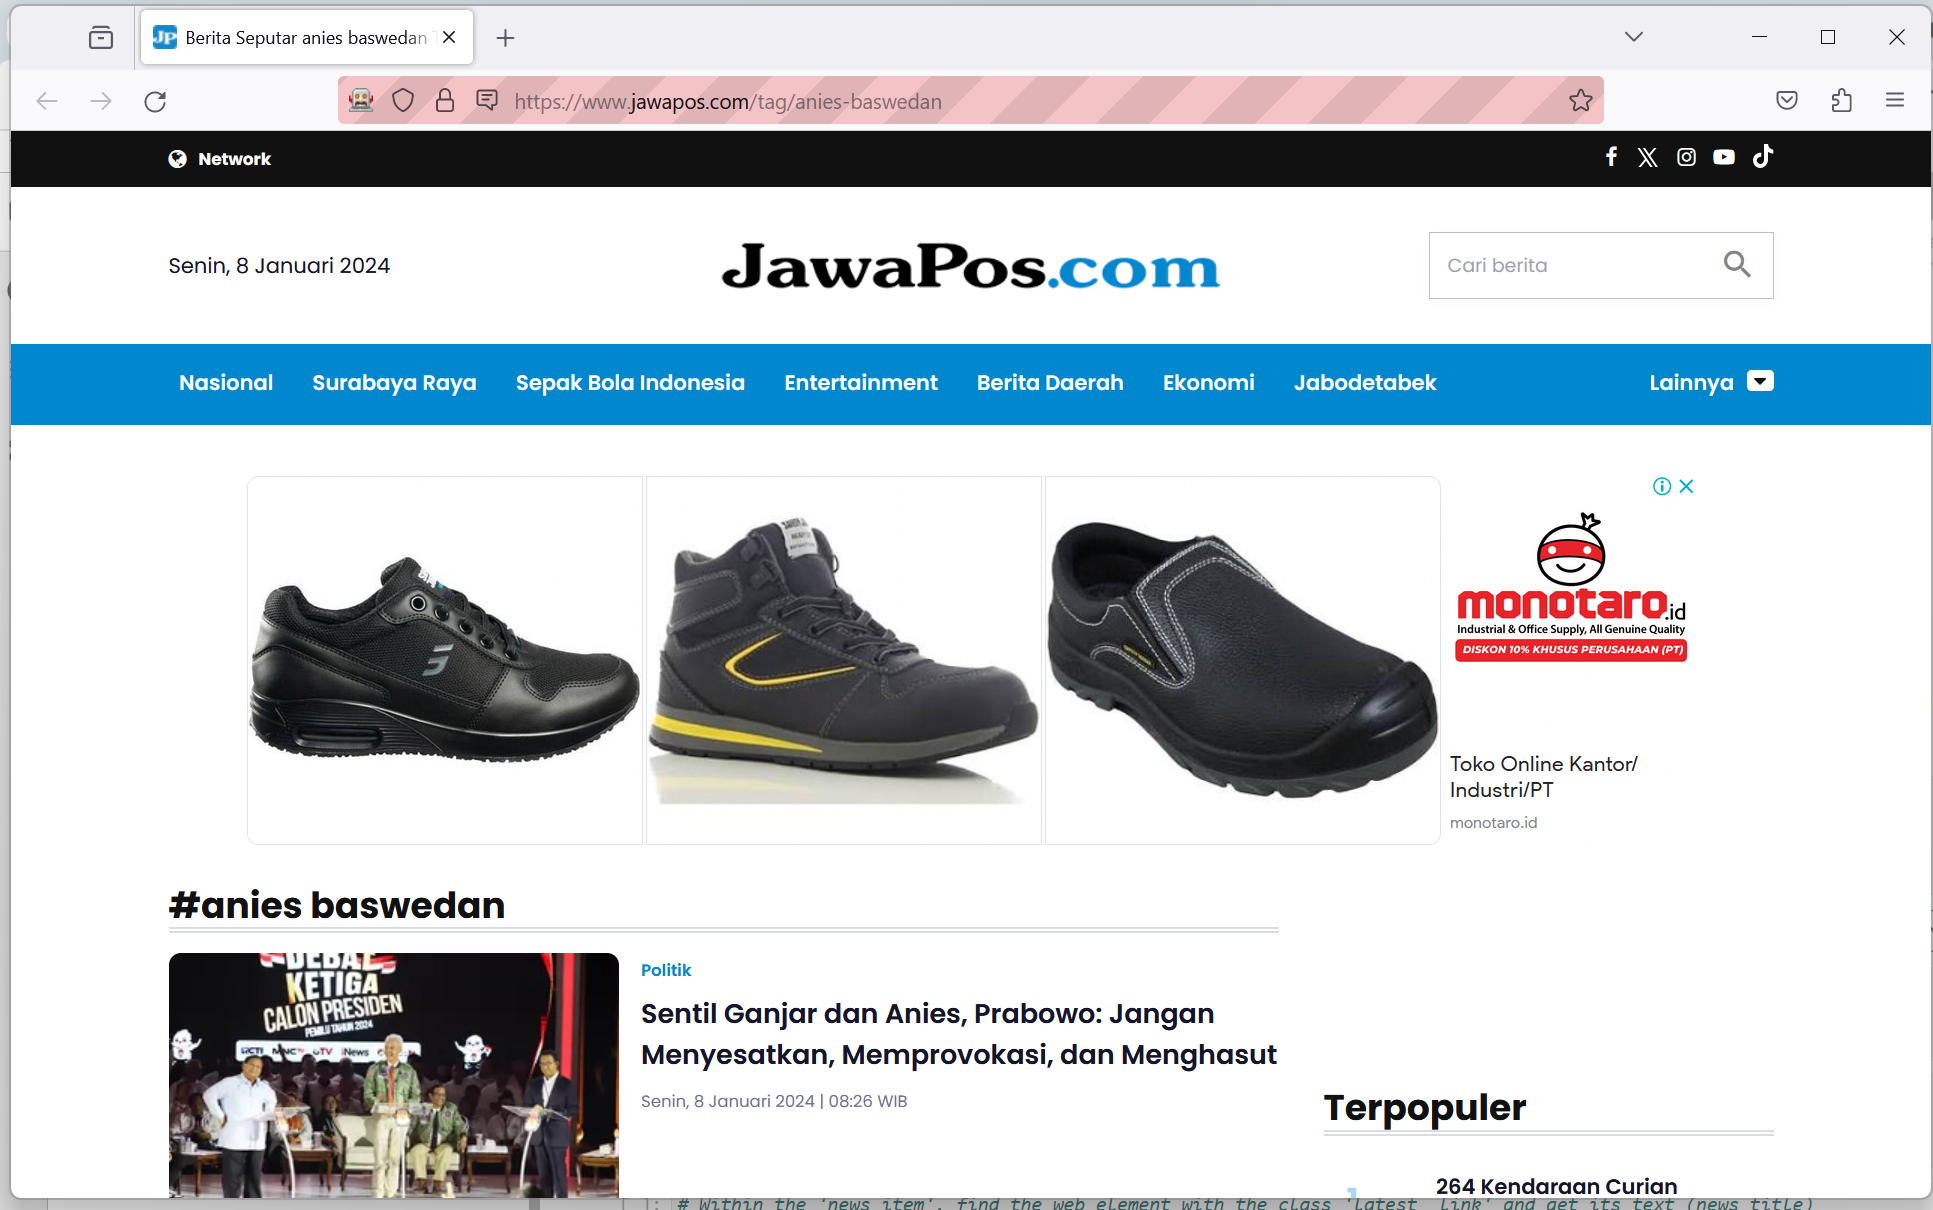

In [8]:
# Locate a single web element with the class 'latest__item' on the page
news_item = driver.find_element(By.CLASS_NAME, 'latest__item')  # Represents a single news item
news_item

<selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element="f962ec89-5dec-4a6b-82b1-8ba955781414")>

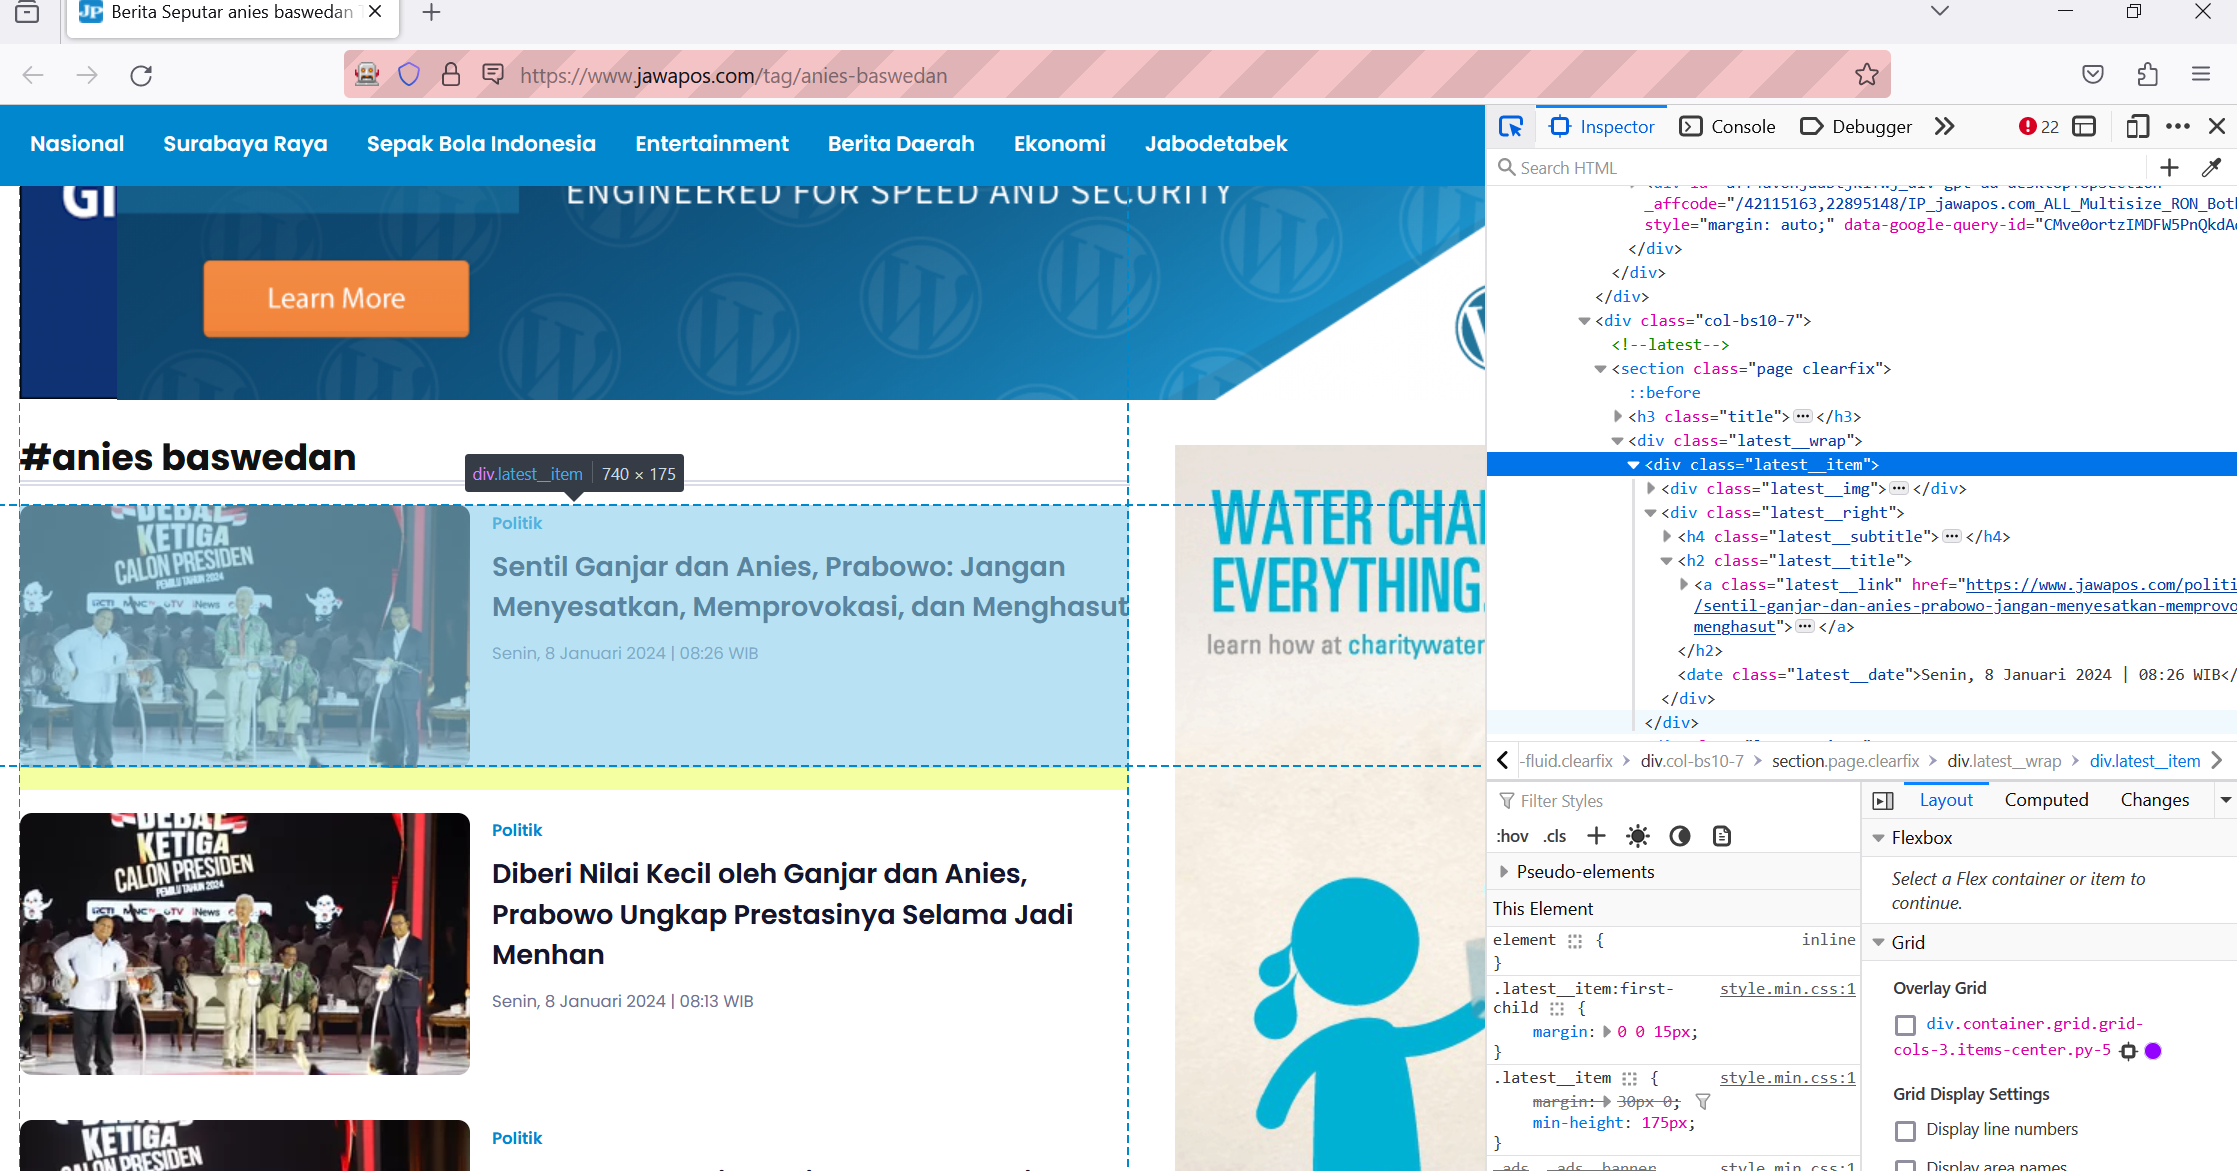

In [9]:
# Locate a list of web elements with the class 'latest__item' on the page
news_items = driver.find_elements(By.CLASS_NAME, 'latest__item') # Represents a list of news items
news_items

[<selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element="f962ec89-5dec-4a6b-82b1-8ba955781414")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element="de5c4d2f-bc4e-452c-9167-86ec8c597d80")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element="37ec6ebb-a73e-43d2-a48e-94bab3fede4e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element="c9cde19f-9b56-4105-8f49-d63a267c3b7c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element="8e0d374a-436f-4fc0-afbc-656ccf8f7e05")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element="d186870b-88f9-4062-8871-d107bd89805d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="19665776-181d-4a31-b096-c6eac74cd9eb", element

In [10]:
# Within the 'news_item', find the web element with the class 'latest__link' and get its text (news title)
title = news_item.find_element(By.CLASS_NAME, 'latest__link').text # Retrieve the title inside the news item

print(title)

Sentil Ganjar dan Anies, Prabowo: Jangan Menyesatkan, Memprovokasi, dan Menghasut


In [11]:
# Within the 'news_item', find the web element with the class 'latest__link' and get its 'href' attribute (URL)
url = news_item.find_element(By.CLASS_NAME, 'latest__link').get_attribute('href') # Retrieve the URL inside the news item
print(url)

https://www.jawapos.com/politik/013707520/sentil-ganjar-dan-anies-prabowo-jangan-menyesatkan-memprovokasi-dan-menghasut


Now, let's delve deeper into scraping. We'll extract multiple pieces of information from each news content simultaneously

In [12]:
def jawapos_news(driver, keyword, start_date):
    # Convert spaces in the keyword to dashes to create a suitable URL
    keyword_url = keyword.replace(' ','-')
    
    # Convert start_date to pandas Timestamp
    start_date = pd.Timestamp(start_date)
    
    # Initialize an empty list to store news information
    news = []
    
    # Mapping for Indonesian months to English abbreviations
    month_map = {'Desember':'Dec', 'Januari':'Jan'}
    
    # Loop to iterate over pages (up to 15 pages or until start_date is reached)
    x = 1
    while True:
        # Construct the URL for the JawaPos website with the specified keyword and page number
        url_jawa = f'https://www.jawapos.com/tag/{keyword_url}?page={x}'
        
        # Open the URL in the browser using the provided WebDriver instance ('driver')
        driver.get(url_jawa)

        # Find all news articles on the page
        articles = driver.find_elements(By.CLASS_NAME, 'latest__item')

        # Loop through each article and extract relevant information
        for i in articles:
            url = i.find_element(By.CLASS_NAME, 'latest__link').get_attribute('href')
            title = i.find_element(By.CLASS_NAME, 'latest__link').text
            date = i.find_element(By.CLASS_NAME, 'latest__date').text
            
            # Process and standardize the date format
            date = date.split(',')[1].replace('|','')
            for i,j in month_map.items():
                date = date.replace(i,j)
            date = pd.to_datetime(date)
            
            # If the article date is earlier than the specified start_date, stop collecting
            if start_date > date:
                break

            # Append the news information to the 'news' list
            news.append({
                'keyword': keyword,
                'platform': 'jawapos',
                'date': date,
                'url': url,
                'title': title
            })
            
        # Check if start_date is reached or if the maximum page limit (20) is reached
        if (start_date > date) or (x == 20):
            break
            
        # Move to the next page
        x += 1
    
    # Return the collected news information
    return news

In [13]:
anies_news = jawapos_news(driver=driver, keyword='anies baswedan', start_date='2024-01-01')
prabowo_news = jawapos_news(driver=driver, keyword='prabowo subianto', start_date='2024-01-01')
ganjar_news = jawapos_news(driver=driver, keyword='ganjar pranowo', start_date='2024-01-01')

C:\Users\Nusatrip\anaconda3\Lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname WIB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Always remember to close the WebDriver instance using the "driver.close()" command once you have completed your tasks and no longer need the browser session, as it helps efficiently manage system resources and ensures a clean exit from the automation environment.

In [14]:
driver.close()

In [17]:
df_anies = pd.DataFrame(anies_news)
df_prabowo = pd.DataFrame(prabowo_news)
df_ganjar = pd.DataFrame(ganjar_news)

df_all = pd.concat([df_anies,df_prabowo,df_ganjar])
df_all['date'] = df_all['date'].dt.date


df_all.pivot_table(values='title', index='date', columns='keyword', aggfunc='count').fillna(0).astype(int)

keyword,anies baswedan,ganjar pranowo,prabowo subianto
date,,,
2024-01-01,3,6,1
2024-01-02,5,3,4
2024-01-03,4,7,4
2024-01-04,1,5,6
2024-01-05,0,4,5
2024-01-06,0,1,3
2024-01-07,16,14,25
2024-01-08,8,8,10
